In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats
import pickle

In [2]:
df_NewsAll = pd.read_csv("./teamkim_datas.NEWS_ALL.csv")
df_healthjosun = pd.read_csv("./teamkim_datas.NEWS_healthjosun.csv")
df_komedi = pd.read_csv("./teamkim_datas.NEWS_komedi.csv")
df_mbc = pd.read_csv("./teamkim_datas.NEWS_mbc.csv")
df_dcinside = pd.read_csv("./teamkim_datas.SNS_DCinside.csv")
df_helpline = pd.read_csv("./teamkim_datas.SNS_helpline.csv")

### 분석 1 : 희귀질환에 관한 관심도의 시기적 변화 추이 파악

#### 데이터 정제

In [3]:
df_NewsAll["pubDate"]

0       Fri, 23 Feb 2024 16:44:00 +0900
1       Fri, 23 Feb 2024 16:44:00 +0900
2       Fri, 23 Feb 2024 16:36:00 +0900
3       Fri, 23 Feb 2024 16:32:00 +0900
4       Fri, 23 Feb 2024 16:28:00 +0900
                     ...               
9995    Tue, 13 Feb 2024 09:08:00 +0900
9996    Tue, 13 Feb 2024 09:08:00 +0900
9997    Tue, 13 Feb 2024 09:06:00 +0900
9998    Tue, 13 Feb 2024 09:05:00 +0900
9999    Tue, 13 Feb 2024 09:04:00 +0900
Name: pubDate, Length: 10000, dtype: object

In [4]:
df_NewsAll_date = pd.to_datetime(df_NewsAll["pubDate"]).dt.strftime("%Y/%m/%d")
df_NewsAll_date = pd.DataFrame(df_NewsAll_date)
df_NewsAll_date

,pubDate
0,2024/02/23
1,2024/02/23
2,2024/02/23
3,2024/02/23
4,2024/02/23
...,...
9995,2024/02/13
9996,2024/02/13
9997,2024/02/13
9998,2024/02/13


In [5]:
df_healthjosun["news_time"]

0      입력 2024.02.26 15:43
1      입력 2024.02.18 06:00
2      입력 2024.02.19 06:00
3      입력 2024.02.19 06:00
4      입력 2024.02.13 15:10
              ...         
213    입력 2023.07.21 11:23
214    입력 2023.07.21 11:23
215    입력 2023.05.02 14:04
216    입력 2023.03.29 08:30
217    입력 2023.03.10 15:51
Name: news_time, Length: 218, dtype: object

In [6]:
df_healthjosun['news_time'] = df_healthjosun['news_time'].str.replace('입력', '').str.strip()
df_healthjosun_date = pd.to_datetime(df_healthjosun["news_time"]).dt.strftime("%Y/%m/%d")
df_healthjosun_date = pd.DataFrame(df_healthjosun_date)
df_healthjosun_date

,news_time
0,2024/02/26
1,2024/02/18
2,2024/02/19
3,2024/02/19
4,2024/02/13
...,...
213,2023/07/21
214,2023/07/21
215,2023/05/02
216,2023/03/29


In [7]:
df_komedi["news_time"]

0      2024.02.12 12:44
1      2024.01.29 18:32
2      2024.02.02 15:40
3      2024.01.22 13:38
4      2024.01.24 14:14
             ...       
877    2011.03.18 11:07
878    2010.06.11 20:55
879    2009.11.23 14:31
880    2009.02.20 12:57
881    2009.02.01 15:59
Name: news_time, Length: 882, dtype: object

In [8]:
df_komedi_date = pd.to_datetime(df_komedi["news_time"]).dt.strftime("%Y/%m/%d")
df_komedi_date = pd.DataFrame(df_komedi_date)
df_komedi_date

,news_time
0,2024/02/12
1,2024/01/29
2,2024/02/02
3,2024/01/22
4,2024/01/24
...,...
877,2011/03/18
878,2010/06/11
879,2009/11/23
880,2009/02/20


In [9]:
df_mbc['news_time']

0      입력 2023-12-29 17:10
1      입력 2023-11-30 14:51
2      입력 2023-10-11 17:36
3      입력 2023-12-19 11:48
4      입력 2023-08-03 07:24
              ...         
374    입력 2016-04-25 06:16
375    입력 2016-04-25 06:16
376    입력 2016-04-25 06:16
377    입력 2016-04-25 06:16
378    입력 2016-04-25 06:16
Name: news_time, Length: 379, dtype: object

In [10]:
df_mbc['news_time'] = df_mbc['news_time'].str.replace('입력', '').str.strip()
df_mbc_date = pd.to_datetime(df_mbc["news_time"]).dt.strftime("%Y/%m/%d")
df_mbc_date = pd.DataFrame(df_mbc_date)
df_mbc_date

,news_time
0,2023/12/29
1,2023/11/30
2,2023/10/11
3,2023/12/19
4,2023/08/03
...,...
374,2016/04/25
375,2016/04/25
376,2016/04/25
377,2016/04/25


In [11]:
df_dcinside["date"]

0      2024.02.23 18:32:18
1      2024.02.21 17:02:35
2      2024.02.21 16:46:18
3      2024.02.17 21:15:50
4      2024.02.16 14:51:29
              ...         
484    2019.08.06 06:26:42
485    2019.08.02 03:19:15
486    2019.07.14 11:18:13
487    2019.04.18 09:47:41
488    2019.04.16 20:17:10
Name: date, Length: 489, dtype: object

In [12]:
df_dcinside_date = pd.to_datetime(df_dcinside["date"]).dt.strftime("%Y/%m/%d")
df_dcinside_date = pd.DataFrame(df_dcinside_date)
df_dcinside_date

,date
0,2024/02/23
1,2024/02/21
2,2024/02/21
3,2024/02/17
4,2024/02/16
...,...
484,2019/08/06
485,2019/08/02
486,2019/07/14
487,2019/04/18


In [13]:
df_helpline["date"]

0      2024-02-20 16:54
1      2024-02-20 16:32
2      2024-02-20 10:57
3      2024-02-20 00:26
4      2024-02-19 17:07
             ...       
700    2018-12-31 08:57
701    2018-12-31 01:44
702    2018-12-30 01:11
703    2018-12-27 09:44
704    2018-12-26 19:24
Name: date, Length: 705, dtype: object

In [14]:
df_helpline_date = pd.to_datetime(df_helpline["date"]).dt.strftime("%Y/%m/%d")
df_helpline_date = pd.DataFrame(df_helpline_date)
df_helpline_date

,date
0,2024/02/20
1,2024/02/20
2,2024/02/20
3,2024/02/20
4,2024/02/19
...,...
700,2018/12/31
701,2018/12/31
702,2018/12/30
703,2018/12/27


In [15]:
# date_dataset =>>   df_NewsAll_date,df_healthjosun_date , df_komedi_date, df_mbc_date, df_dcinside_date,df_helpline_date

In [16]:
df_NewsAll_date["pubDate"] = pd.to_datetime(df_NewsAll_date["pubDate"])
df_healthjosun_date["news_time"] = pd.to_datetime(df_healthjosun_date["news_time"])
df_komedi_date["news_time"] = pd.to_datetime(df_komedi_date["news_time"])
df_mbc_date["news_time"] = pd.to_datetime(df_mbc_date["news_time"])
df_dcinside_date["date"] = pd.to_datetime(df_dcinside_date["date"])
df_helpline_date["date"] = pd.to_datetime(df_helpline_date["date"])

# 연도만 추출
df_NewsAll_date["year"] = df_NewsAll_date["pubDate"].dt.year
df_healthjosun_date["year"] = df_healthjosun_date["news_time"].dt.year
df_komedi_date["year"] = df_komedi_date["news_time"].dt.year
df_mbc_date["year"] = df_mbc_date["news_time"].dt.year
df_dcinside_date["year"] = df_dcinside_date["date"].dt.year
df_helpline_date["year"] = df_helpline_date["date"].dt.year

In [17]:
df_komedi_date["year"].value_counts()

year
2023    212
2022    120
2018     92
2019     80
2017     47
2021     46
2020     45
2024     43
2016     43
2015     32
2014     31
2011     22
2009     21
2013     19
2010     14
2012     11
2008      4
Name: count, dtype: int64

In [18]:
#df_NewsAll_date["year"] 데이터 프레임은 전부다 2024 년 데이터만 있기에 제외하겠음.
concat_date = pd.concat([df_healthjosun_date["year"],df_komedi_date["year"],df_mbc_date["year"],df_dcinside_date["year"],df_helpline_date["year"]], ignore_index=True)
concat_date = pd.DataFrame(concat_date.value_counts())
concat_date

,count
year,
2023,792
2022,387
2021,327
2019,253
2020,222
2016,161
2024,158
2018,135
2017,84


<Axes: xlabel='year', ylabel='count'>

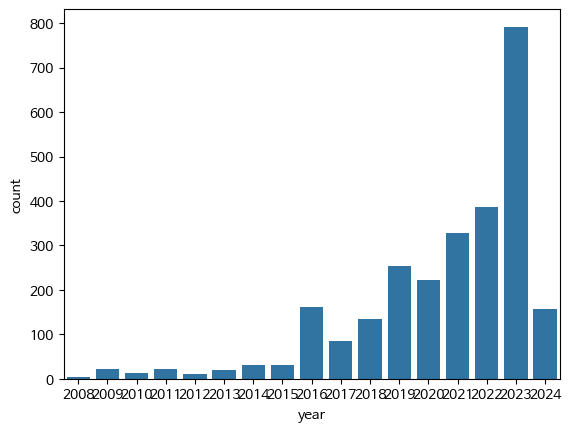

In [19]:
# 연도별 희귀질환 관련 게시글의 빈도수 (뉴스+커뮤니티)
sns.barplot(data = concat_date , x = "year", y = "count")

### 분석
- 희귀질환에 대한 관심의 증감: 연도별 게시글 빈도를 분석하여 특정 기간에 희귀질환에 대한 관심이 증가하거나 감소하는지 확인할 수 있습니다. 이를 통해 특정 시기에 관련 이슈나 트렌드가 있었는지 파악할 수 있습니다.

- 희귀질환과 관련된 키워드 및 토픽: 게시글의 내용을 분석하여 연도별로 어떤 희귀질환에 대한 관심이 높았는지, 어떤 키워드가 많이 언급되었는지 파악할 수 있습니다. 이를 통해 특정 희귀질환에 대한 관심이나 연구 트렌드를 이해할 수 있습니다.

- 의료 및 연구 동향: 연도별 게시글 빈도를 분석하여 의료 및 연구 분야에서 특정 희귀질환에 대한 연구 또는 치료법 개발에 대한 관심이 증가했는지, 특정 연도에 어떤 연구 동향이 있었는지 파악할 수 있습니다.

- 환자 커뮤니티 및 지원 활동: 희귀질환 환자들이나 그들을 지원하는 단체들이 연도별로 어떤 이슈에 대해 논의하고 있는지, 어떤 지원 활동을 펼치고 있는지 파악할 수 있습니다.

- 마케팅 및 의사소통 전략: 연도별 게시글 빈도를 분석하여 기업이나 의료기관이 어떤 의사소통 전략을 활용했는지, 어떤 마케팅 활동을 펼쳤는지 파악할 수 있습니다.